<a href="https://colab.research.google.com/github/lgy112112/Fastai_LiverTumor_Segmentation_Tutorial/blob/main/LiTS_2D_UNet_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install segmentation-models-pytorch
!pip install lightning

import numpy as np
import nibabel as nib
import os
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
from segmentation_models_pytorch import utils
import albumentations as A
from albumentations.pytorch import ToTensorV2

import lightning as L
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
# introduce fastai loss func
from fastai.losses import *
import torchmetrics

# **Data Readin** and Do Some Checkü´§ü´§üôÅ


In [ ]:
# !rm -rf /content/drive/MyDrive/npy_dataset/npy_images
# !rm -rf /content/drive/MyDrive/npy_dataset/npy_labels

In [ ]:
# import numpy as np
# import nibabel as nib
# import os
# from tqdm.notebook import tqdm
# # ÂÆö‰πâÂ≠òÂÇ®ÂõæÂÉèÂíåÊ†áÁ≠æÁöÑÁõÆÂΩïË∑ØÂæÑ
# image_dir = '/content/drive/MyDrive/volumes'
# label_dir = '/content/drive/MyDrive/segmentations'

# # ÂÆö‰πâËæìÂá∫ÁõÆÂΩï
# !mkdir -p /content/drive/MyDrive/npy_dataset/npy_images
# output_dir_images = '/content/drive/MyDrive/npy_dataset/npy_images'

# !mkdir -p /content/drive/MyDrive/npy_dataset/npy_labels
# output_dir_labels = '/content/drive/MyDrive/npy_dataset/npy_labels'

# # Á°Æ‰øùËæìÂá∫ÁõÆÂΩïÂ≠òÂú®
# os.makedirs(output_dir_images, exist_ok=True)
# os.makedirs(output_dir_labels, exist_ok=True)

# total_files = 51

# for i in tqdm(range(total_files), desc='ËΩ¨Êç¢ËøõÂ∫¶'):
#     # ÊûÑÂª∫Êñá‰ª∂Âêç
#     image_filename = f'volume-{i}.nii'
#     label_filename = f'segmentation-{i}.nii'

#     # ÊûÑÂª∫ÂÆåÊï¥ÁöÑÊñá‰ª∂Ë∑ØÂæÑ
#     image_path = os.path.join(image_dir, image_filename)
#     label_path = os.path.join(label_dir, label_filename)

#     # Âä†ËΩΩÂõæÂÉèÂíåÊ†áÁ≠æÊñá‰ª∂
#     image = nib.load(image_path).get_fdata()
#     label = nib.load(label_path).get_fdata()

#     # Ëé∑ÂèñÂõæÂÉèÁöÑÂ±ÇÊï∞
#     num_slices = image.shape[-1]
#     num_slices_label = label.shape[-1]

#     print(f'image {i} ÁöÑÂ±ÇÊï∞‰∏∫ {num_slices}„ÄÇ')
#     print(f'label {i} ÁöÑÂ±ÇÊï∞‰∏∫ {num_slices_label}„ÄÇ')

#     # Âæ™ÁéØÈÅçÂéÜÊØè‰∏ÄÂ±Ç
#     for slice_index in tqdm(range(num_slices_label)):
#         # ÊèêÂèñÂΩìÂâçÂ±ÇÁöÑÂõæÂÉèÂíåÊ†áÁ≠æ
#         image_slice = image[:, :, slice_index]
#         label_slice = label[:, :, slice_index]

#         # ‰øùÂ≠òÂΩìÂâçÂ±Ç‰∏∫npyÊ†ºÂºè
#         np.save(os.path.join(output_dir_images, f'image_{i}_slice_{slice_index}.npy'), image_slice)
#         np.save(os.path.join(output_dir_labels, f'label_{i}_slice_{slice_index}.npy'), label_slice)

#     print(f'Âç∑ÁßØ {i} ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ')


ËΩ¨Êç¢ËøõÂ∫¶:   0%|          | 0/51 [00:00<?, ?it/s]

image 0 ÁöÑÂ±ÇÊï∞‰∏∫ 75„ÄÇ
label 0 ÁöÑÂ±ÇÊï∞‰∏∫ 75„ÄÇ


  0%|          | 0/75 [00:00<?, ?it/s]

Âç∑ÁßØ 0 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 1 ÁöÑÂ±ÇÊï∞‰∏∫ 123„ÄÇ
label 1 ÁöÑÂ±ÇÊï∞‰∏∫ 123„ÄÇ


  0%|          | 0/123 [00:00<?, ?it/s]

Âç∑ÁßØ 1 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 2 ÁöÑÂ±ÇÊï∞‰∏∫ 517„ÄÇ
label 2 ÁöÑÂ±ÇÊï∞‰∏∫ 517„ÄÇ


  0%|          | 0/517 [00:00<?, ?it/s]

Âç∑ÁßØ 2 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 3 ÁöÑÂ±ÇÊï∞‰∏∫ 534„ÄÇ
label 3 ÁöÑÂ±ÇÊï∞‰∏∫ 534„ÄÇ


  0%|          | 0/534 [00:00<?, ?it/s]

Âç∑ÁßØ 3 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 4 ÁöÑÂ±ÇÊï∞‰∏∫ 841„ÄÇ
label 4 ÁöÑÂ±ÇÊï∞‰∏∫ 841„ÄÇ


  0%|          | 0/841 [00:00<?, ?it/s]

Âç∑ÁßØ 4 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 5 ÁöÑÂ±ÇÊï∞‰∏∫ 537„ÄÇ
label 5 ÁöÑÂ±ÇÊï∞‰∏∫ 537„ÄÇ


  0%|          | 0/537 [00:00<?, ?it/s]

Âç∑ÁßØ 5 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 6 ÁöÑÂ±ÇÊï∞‰∏∫ 518„ÄÇ
label 6 ÁöÑÂ±ÇÊï∞‰∏∫ 518„ÄÇ


  0%|          | 0/518 [00:00<?, ?it/s]

Âç∑ÁßØ 6 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 7 ÁöÑÂ±ÇÊï∞‰∏∫ 541„ÄÇ
label 7 ÁöÑÂ±ÇÊï∞‰∏∫ 541„ÄÇ


  0%|          | 0/541 [00:00<?, ?it/s]

Âç∑ÁßØ 7 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 8 ÁöÑÂ±ÇÊï∞‰∏∫ 541„ÄÇ
label 8 ÁöÑÂ±ÇÊï∞‰∏∫ 541„ÄÇ


  0%|          | 0/541 [00:00<?, ?it/s]

Âç∑ÁßØ 8 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 9 ÁöÑÂ±ÇÊï∞‰∏∫ 549„ÄÇ
label 9 ÁöÑÂ±ÇÊï∞‰∏∫ 549„ÄÇ


  0%|          | 0/549 [00:00<?, ?it/s]

Âç∑ÁßØ 9 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 10 ÁöÑÂ±ÇÊï∞‰∏∫ 501„ÄÇ
label 10 ÁöÑÂ±ÇÊï∞‰∏∫ 501„ÄÇ


  0%|          | 0/501 [00:00<?, ?it/s]

Âç∑ÁßØ 10 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 11 ÁöÑÂ±ÇÊï∞‰∏∫ 466„ÄÇ
label 11 ÁöÑÂ±ÇÊï∞‰∏∫ 466„ÄÇ


  0%|          | 0/466 [00:00<?, ?it/s]

Âç∑ÁßØ 11 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 12 ÁöÑÂ±ÇÊï∞‰∏∫ 455„ÄÇ
label 12 ÁöÑÂ±ÇÊï∞‰∏∫ 455„ÄÇ


  0%|          | 0/455 [00:00<?, ?it/s]

Âç∑ÁßØ 12 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 13 ÁöÑÂ±ÇÊï∞‰∏∫ 605„ÄÇ
label 13 ÁöÑÂ±ÇÊï∞‰∏∫ 605„ÄÇ


  0%|          | 0/605 [00:00<?, ?it/s]

Âç∑ÁßØ 13 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 14 ÁöÑÂ±ÇÊï∞‰∏∫ 588„ÄÇ
label 14 ÁöÑÂ±ÇÊï∞‰∏∫ 588„ÄÇ


  0%|          | 0/588 [00:00<?, ?it/s]

Âç∑ÁßØ 14 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 15 ÁöÑÂ±ÇÊï∞‰∏∫ 565„ÄÇ
label 15 ÁöÑÂ±ÇÊï∞‰∏∫ 565„ÄÇ


  0%|          | 0/565 [00:00<?, ?it/s]

Âç∑ÁßØ 15 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 16 ÁöÑÂ±ÇÊï∞‰∏∫ 689„ÄÇ
label 16 ÁöÑÂ±ÇÊï∞‰∏∫ 689„ÄÇ


  0%|          | 0/689 [00:00<?, ?it/s]

Âç∑ÁßØ 16 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 17 ÁöÑÂ±ÇÊï∞‰∏∫ 826„ÄÇ
label 17 ÁöÑÂ±ÇÊï∞‰∏∫ 826„ÄÇ


  0%|          | 0/826 [00:00<?, ?it/s]

Âç∑ÁßØ 17 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 18 ÁöÑÂ±ÇÊï∞‰∏∫ 845„ÄÇ
label 18 ÁöÑÂ±ÇÊï∞‰∏∫ 845„ÄÇ


  0%|          | 0/845 [00:00<?, ?it/s]

Âç∑ÁßØ 18 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 19 ÁöÑÂ±ÇÊï∞‰∏∫ 547„ÄÇ
label 19 ÁöÑÂ±ÇÊï∞‰∏∫ 547„ÄÇ


  0%|          | 0/547 [00:00<?, ?it/s]

Âç∑ÁßØ 19 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 20 ÁöÑÂ±ÇÊï∞‰∏∫ 574„ÄÇ
label 20 ÁöÑÂ±ÇÊï∞‰∏∫ 574„ÄÇ


  0%|          | 0/574 [00:00<?, ?it/s]

Âç∑ÁßØ 20 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 21 ÁöÑÂ±ÇÊï∞‰∏∫ 437„ÄÇ
label 21 ÁöÑÂ±ÇÊï∞‰∏∫ 437„ÄÇ


  0%|          | 0/437 [00:00<?, ?it/s]

Âç∑ÁßØ 21 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 22 ÁöÑÂ±ÇÊï∞‰∏∫ 247„ÄÇ
label 22 ÁöÑÂ±ÇÊï∞‰∏∫ 247„ÄÇ


  0%|          | 0/247 [00:00<?, ?it/s]

Âç∑ÁßØ 22 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 23 ÁöÑÂ±ÇÊï∞‰∏∫ 391„ÄÇ
label 23 ÁöÑÂ±ÇÊï∞‰∏∫ 391„ÄÇ


  0%|          | 0/391 [00:00<?, ?it/s]

Âç∑ÁßØ 23 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 24 ÁöÑÂ±ÇÊï∞‰∏∫ 276„ÄÇ
label 24 ÁöÑÂ±ÇÊï∞‰∏∫ 276„ÄÇ


  0%|          | 0/276 [00:00<?, ?it/s]

Âç∑ÁßØ 24 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 25 ÁöÑÂ±ÇÊï∞‰∏∫ 601„ÄÇ
label 25 ÁöÑÂ±ÇÊï∞‰∏∫ 601„ÄÇ


  0%|          | 0/601 [00:00<?, ?it/s]

Âç∑ÁßØ 25 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 26 ÁöÑÂ±ÇÊï∞‰∏∫ 668„ÄÇ
label 26 ÁöÑÂ±ÇÊï∞‰∏∫ 668„ÄÇ


  0%|          | 0/668 [00:00<?, ?it/s]

Âç∑ÁßØ 26 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 27 ÁöÑÂ±ÇÊï∞‰∏∫ 861„ÄÇ
label 27 ÁöÑÂ±ÇÊï∞‰∏∫ 861„ÄÇ


  0%|          | 0/861 [00:00<?, ?it/s]

Âç∑ÁßØ 27 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 28 ÁöÑÂ±ÇÊï∞‰∏∫ 129„ÄÇ
label 28 ÁöÑÂ±ÇÊï∞‰∏∫ 129„ÄÇ


  0%|          | 0/129 [00:00<?, ?it/s]

Âç∑ÁßØ 28 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 29 ÁöÑÂ±ÇÊï∞‰∏∫ 172„ÄÇ
label 29 ÁöÑÂ±ÇÊï∞‰∏∫ 172„ÄÇ


  0%|          | 0/172 [00:00<?, ?it/s]

Âç∑ÁßØ 29 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 30 ÁöÑÂ±ÇÊï∞‰∏∫ 200„ÄÇ
label 30 ÁöÑÂ±ÇÊï∞‰∏∫ 200„ÄÇ


  0%|          | 0/200 [00:00<?, ?it/s]

Âç∑ÁßØ 30 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 31 ÁöÑÂ±ÇÊï∞‰∏∫ 91„ÄÇ
label 31 ÁöÑÂ±ÇÊï∞‰∏∫ 91„ÄÇ


  0%|          | 0/91 [00:00<?, ?it/s]

Âç∑ÁßØ 31 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 32 ÁöÑÂ±ÇÊï∞‰∏∫ 139„ÄÇ
label 32 ÁöÑÂ±ÇÊï∞‰∏∫ 139„ÄÇ


  0%|          | 0/139 [00:00<?, ?it/s]

Âç∑ÁßØ 32 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 33 ÁöÑÂ±ÇÊï∞‰∏∫ 135„ÄÇ
label 33 ÁöÑÂ±ÇÊï∞‰∏∫ 135„ÄÇ


  0%|          | 0/135 [00:00<?, ?it/s]

Âç∑ÁßØ 33 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 34 ÁöÑÂ±ÇÊï∞‰∏∫ 151„ÄÇ
label 34 ÁöÑÂ±ÇÊï∞‰∏∫ 151„ÄÇ


  0%|          | 0/151 [00:00<?, ?it/s]

Âç∑ÁßØ 34 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 35 ÁöÑÂ±ÇÊï∞‰∏∫ 124„ÄÇ
label 35 ÁöÑÂ±ÇÊï∞‰∏∫ 124„ÄÇ


  0%|          | 0/124 [00:00<?, ?it/s]

Âç∑ÁßØ 35 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 36 ÁöÑÂ±ÇÊï∞‰∏∫ 111„ÄÇ
label 36 ÁöÑÂ±ÇÊï∞‰∏∫ 111„ÄÇ


  0%|          | 0/111 [00:00<?, ?it/s]

Âç∑ÁßØ 36 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 37 ÁöÑÂ±ÇÊï∞‰∏∫ 122„ÄÇ
label 37 ÁöÑÂ±ÇÊï∞‰∏∫ 122„ÄÇ


  0%|          | 0/122 [00:00<?, ?it/s]

Âç∑ÁßØ 37 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 38 ÁöÑÂ±ÇÊï∞‰∏∫ 132„ÄÇ
label 38 ÁöÑÂ±ÇÊï∞‰∏∫ 132„ÄÇ


  0%|          | 0/132 [00:00<?, ?it/s]

Âç∑ÁßØ 38 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 39 ÁöÑÂ±ÇÊï∞‰∏∫ 260„ÄÇ
label 39 ÁöÑÂ±ÇÊï∞‰∏∫ 260„ÄÇ


  0%|          | 0/260 [00:00<?, ?it/s]

Âç∑ÁßØ 39 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 40 ÁöÑÂ±ÇÊï∞‰∏∫ 122„ÄÇ
label 40 ÁöÑÂ±ÇÊï∞‰∏∫ 122„ÄÇ


  0%|          | 0/122 [00:00<?, ?it/s]

Âç∑ÁßØ 40 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 41 ÁöÑÂ±ÇÊï∞‰∏∫ 113„ÄÇ
label 41 ÁöÑÂ±ÇÊï∞‰∏∫ 113„ÄÇ


  0%|          | 0/113 [00:00<?, ?it/s]

Âç∑ÁßØ 41 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 42 ÁöÑÂ±ÇÊï∞‰∏∫ 125„ÄÇ
label 42 ÁöÑÂ±ÇÊï∞‰∏∫ 125„ÄÇ


  0%|          | 0/125 [00:00<?, ?it/s]

Âç∑ÁßØ 42 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 43 ÁöÑÂ±ÇÊï∞‰∏∫ 155„ÄÇ
label 43 ÁöÑÂ±ÇÊï∞‰∏∫ 155„ÄÇ


  0%|          | 0/155 [00:00<?, ?it/s]

Âç∑ÁßØ 43 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 44 ÁöÑÂ±ÇÊï∞‰∏∫ 119„ÄÇ
label 44 ÁöÑÂ±ÇÊï∞‰∏∫ 119„ÄÇ


  0%|          | 0/119 [00:00<?, ?it/s]

Âç∑ÁßØ 44 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 45 ÁöÑÂ±ÇÊï∞‰∏∫ 74„ÄÇ
label 45 ÁöÑÂ±ÇÊï∞‰∏∫ 74„ÄÇ


  0%|          | 0/74 [00:00<?, ?it/s]

Âç∑ÁßØ 45 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 46 ÁöÑÂ±ÇÊï∞‰∏∫ 124„ÄÇ
label 46 ÁöÑÂ±ÇÊï∞‰∏∫ 124„ÄÇ


  0%|          | 0/124 [00:00<?, ?it/s]

Âç∑ÁßØ 46 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 47 ÁöÑÂ±ÇÊï∞‰∏∫ 225„ÄÇ
label 47 ÁöÑÂ±ÇÊï∞‰∏∫ 225„ÄÇ


  0%|          | 0/225 [00:00<?, ?it/s]

Âç∑ÁßØ 47 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 48 ÁöÑÂ±ÇÊï∞‰∏∫ 244„ÄÇ
label 48 ÁöÑÂ±ÇÊï∞‰∏∫ 244„ÄÇ


  0%|          | 0/244 [00:00<?, ?it/s]

Âç∑ÁßØ 48 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 49 ÁöÑÂ±ÇÊï∞‰∏∫ 254„ÄÇ
label 49 ÁöÑÂ±ÇÊï∞‰∏∫ 254„ÄÇ


  0%|          | 0/254 [00:00<?, ?it/s]

Âç∑ÁßØ 49 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ
image 50 ÁöÑÂ±ÇÊï∞‰∏∫ 240„ÄÇ
label 50 ÁöÑÂ±ÇÊï∞‰∏∫ 240„ÄÇ


  0%|          | 0/240 [00:00<?, ?it/s]

Âç∑ÁßØ 50 ÁöÑÊâÄÊúâÂ±ÇÂ∑≤ÊàêÂäü‰øùÂ≠ò‰∏∫npyÊ†ºÂºè„ÄÇ


Image File: image_1_slice_66.npy
Image Shape: (512, 512)
Unique Values in Image: [-3024. -1024. -1023. ...   869.   893.   910.]
Label File: label_1_slice_66.npy
Label Shape: (512, 512)
Unique Values in Label: [0. 1. 2.]


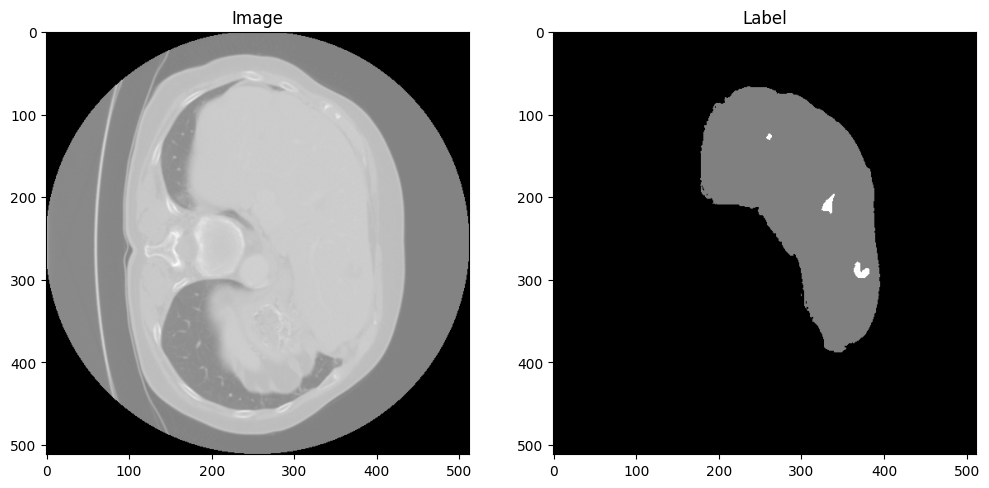

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# ÂÆö‰πâÂ≠òÂÇ®npyÂõæÂÉèÂíåÊ†áÁ≠æÁöÑÁõÆÂΩïË∑ØÂæÑ
npy_image_dir = '/content/drive/MyDrive/npy_dataset/npy_images'
npy_label_dir = '/content/drive/MyDrive/npy_dataset/npy_labels'


# Ëé∑ÂèñÁõÆÂΩï‰∏≠ÁöÑÊâÄÊúâÊñá‰ª∂ÂàóË°®
image_files = os.listdir(npy_image_dir)
label_files = os.listdir(npy_label_dir)

# ÈöèÊú∫ÈÄâÊã©‰∏Ä‰∏™Êñá‰ª∂
random_index = random.randint(0, len(image_files) - 1)
selected_image_file = image_files[random_index]
selected_label_file = label_files[random_index]

# ÊûÑÂª∫ÂÆåÊï¥ÁöÑÊñá‰ª∂Ë∑ØÂæÑ
selected_image_path = os.path.join(npy_image_dir, selected_image_file)
selected_label_path = os.path.join(npy_label_dir, selected_label_file)

# Âä†ËΩΩnpyÊñá‰ª∂
image = np.load(selected_image_path)
label = np.load(selected_label_path)

# Ëé∑ÂèñÂõæÂÉèÁöÑ‰ø°ÊÅØ
image_shape = image.shape
label_shape = label.shape
unique_values_in_image = np.unique(image)
unique_values_in_label = np.unique(label)

# ÊâìÂç∞ÂõæÂÉè‰ø°ÊÅØ
print(f"Image File: {selected_image_file}")
print(f"Image Shape: {image_shape}")
print(f"Unique Values in Image: {unique_values_in_image}")
print(f"Label File: {selected_label_file}")
print(f"Label Shape: {label_shape}")
print(f"Unique Values in Label: {unique_values_in_label}")

# ÊòæÁ§∫ÂõæÂÉèÂíåÊ†áÁ≠æ
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(label, cmap='gray')
ax[1].set_title('Label')
plt.show()


In [ ]:
len(image_files), len(label_files)

(9268, 9267)

In [ ]:
import os

# ÂÆö‰πâÂ≠òÂÇ®npyÂõæÂÉèÂíåÊ†áÁ≠æÁöÑÁõÆÂΩïË∑ØÂæÑ
npy_image_dir = '/content/drive/MyDrive/npy_dataset/npy_images'
npy_label_dir = '/content/drive/MyDrive/npy_dataset/npy_labels'

# Ëé∑ÂèñÁõÆÂΩï‰∏≠ÁöÑÊâÄÊúâÊñá‰ª∂ÂàóË°®
image_files = os.listdir(npy_image_dir)
label_files = os.listdir(npy_label_dir)

# ÂÅáËÆæÂõæÂÉèÊñá‰ª∂ÂíåÊ†áÁ≠æÊñá‰ª∂Èô§‰∫Ü‰∏Ä‰∏™ÂÖ≥ÈîÆÂ≠óÔºàÊØîÂ¶Ç'image'Âíå'label'ÔºâÂ§ñÔºåÂÖ∂‰ΩôÈÉ®ÂàÜÊñá‰ª∂ÂêçÁõ∏Âêå
# ÂàõÂª∫‰∏Ä‰∏™Âü∫‰∫éÂõæÂÉèÊñá‰ª∂ÁîüÊàêÁöÑÊ†áÁ≠æÊñá‰ª∂ÂêçÁöÑÈõÜÂêà
generated_label_files = {f.replace('image', 'label') for f in image_files}

# ÂÆûÈôÖÁöÑÊ†áÁ≠æÊñá‰ª∂ÂêçÁöÑÈõÜÂêà
actual_label_files = set(label_files)

# ÊâæÂá∫Áº∫Â§±ÁöÑÊ†áÁ≠æÊñá‰ª∂
missing_label_files = generated_label_files - actual_label_files

# ÊâìÂç∞Áº∫Â§±ÁöÑÊñá‰ª∂
if missing_label_files:
    print("Áº∫Â§±ÁöÑÊ†áÁ≠æÊñá‰ª∂:")
    for file in missing_label_files:
        print(file)
else:
    print("Ê≤°ÊúâÁº∫Â§±ÁöÑÊ†áÁ≠æÊñá‰ª∂„ÄÇ")


Áº∫Â§±ÁöÑÊ†áÁ≠æÊñá‰ª∂:
label_17_slice_622.npy


In [ ]:
!rm -rf /content/drive/MyDrive/npy_dataset/npy_images/image_17_slice_622.npy

# **Data Set, Load, Train!üò°**

In [ ]:
import os
# import numpy as np
# import torch
# import albumentations as A
# from albumentations.pytorch import ToTensorV2
# from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# ÂÆö‰πâÂ≠òÂÇ®npyÂõæÂÉèÂíåÊ†áÁ≠æÁöÑÁõÆÂΩïË∑ØÂæÑ
npy_image_dir = '/content/drive/MyDrive/npy_dataset/npy_images'
npy_label_dir = '/content/drive/MyDrive/npy_dataset/npy_labels'

image_files = sorted(os.listdir(npy_image_dir))
label_files = sorted(os.listdir(npy_label_dir))

# ÂàÜÂâ≤Êï∞ÊçÆÈõÜÔºàËøôÈáå‰ª•80%ËÆ≠ÁªÉÔºå20%ÊµãËØï‰∏∫‰æãÔºâ
train_images, val_images, train_labels, val_labels = train_test_split(
    image_files, label_files, test_size=0.2, random_state=42)

len(train_images), len(val_images), len(train_labels), len(val_labels)

ValueError: Found input variables with inconsistent numbers of samples: [9268, 9267]

In [ ]:

# ÂÆö‰πâÊï∞ÊçÆÂ¢ûÂº∫
train_transform = A.Compose([
    # A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(),
    A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2(),
])

val_transform = A.Compose([
    # A.Resize(256, 256),
    A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2(),
])


In [ ]:

class OrganSegmentationDataset(Dataset):
    def __init__(self, image_files, label_files, transform=None):
        self.image_files = image_files
        self.label_files = label_files
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(npy_image_dir, self.image_files[idx])
        label_path = os.path.join(npy_label_dir, self.label_files[idx])

        image = np.load(image_path)
        label = np.load(label_path)

        if self.transform:
            augmented = self.transform(image=image, mask=label)
            image = augmented['image']
            label = augmented['mask']
            label = torch.from_numpy(label).long()  # Áé∞Âú®ÂèØ‰ª•ÂÆâÂÖ®Âú∞Ë∞ÉÁî®.long()

        else:
            # Â¶ÇÊûúÊ≤°ÊúâtransformÔºåÁõ¥Êé•Â∞ÜnumpyÊï∞ÁªÑËΩ¨Êç¢‰∏∫torchÂº†Èáè
            image = torch.from_numpy(image).float()
            label = torch.from_numpy(label).long()  # Áé∞Âú®ÂèØ‰ª•ÂÆâÂÖ®Âú∞Ë∞ÉÁî®.long()

        return image, label


Image shape: torch.Size([512, 512])
Label shape: torch.Size([512, 512])
Unique values in the label: [0]


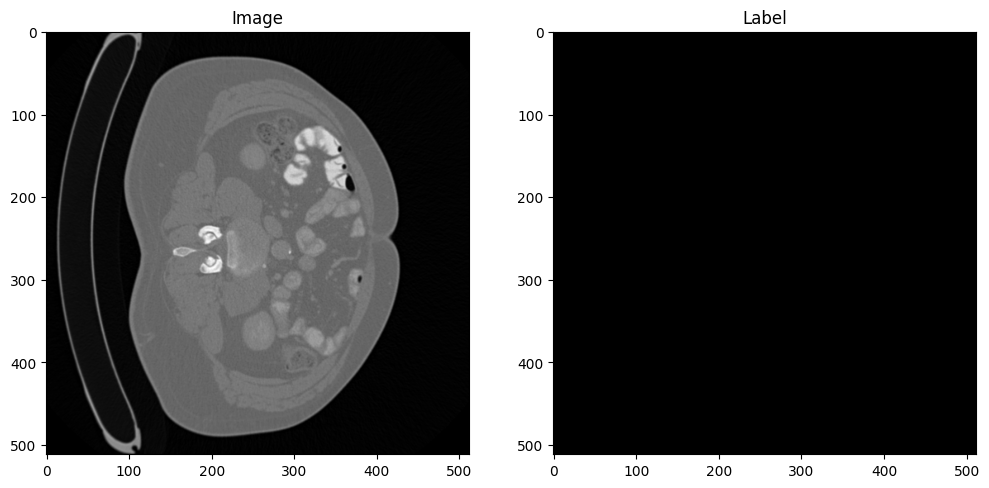

In [ ]:
dataset = OrganSegmentationDataset(image_files=image_files, label_files=label_files, transform=None)

# ÈÄâÊã©Ë¶ÅÊü•ÁúãÁöÑÊ†∑Êú¨Á¥¢Âºï
sample_index = 251

# Âä†ËΩΩ‰∏Ä‰∏™Ê†∑Êú¨
image, label = dataset[sample_index]

# Â∞ÜtensorËΩ¨Êç¢‰∏∫numpyÊï∞ÁªÑÔºàÂ¶ÇÊûú‰ΩøÁî®‰∫Ütransforms.ToTensor()Ôºâ
# Â¶ÇÊûúÊ≤°Êúâ‰ΩøÁî®ËØ•ËΩ¨Êç¢ÔºåÂèØ‰ª•Ë∑≥ËøáÊ≠§Ê≠•È™§
# image = image.numpy()
# label = label.numpy()

# ÊâìÂç∞ÂΩ¢Áä∂ÂíåÁª¥Â∫¶‰ø°ÊÅØ
print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")
print(f"Unique values in the label: {np.unique(label)}")

# ÊòæÁ§∫ÂõæÂÉèÂíåÊ†áÁ≠æ
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image.squeeze(), cmap='gray')  # ‰ΩøÁî®squeeze()‰ª•Èò≤imageÊúâÂ§ö‰ΩôÁöÑÁª¥Â∫¶
axes[0].set_title('Image')
axes[1].imshow(label.squeeze(), cmap='gray')  # Âêå‰∏ä
axes[1].set_title('Label')
plt.show()

In [ ]:
import torchmetrics
import fastai.losses
class UNetModel(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = smp.Unet(
            encoder_name="resnet34",  # ‰ΩøÁî®ResNet34‰Ωú‰∏∫ÁºñÁ†ÅÂô®
            encoder_weights="imagenet",
            in_channels=1,  # Ê†πÊçÆ‰Ω†ÁöÑÊï∞ÊçÆÈõÜ‰øÆÊîπ
            classes=3,  # ËÉåÊôØ„ÄÅËÇùËÑè„ÄÅËÇøÁò§
        )
        self.loss_fn = nn.CrossEntropyLoss()
        # self.accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=3)


    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images) # debug .shape
        # print(f"Outputs shape: {outputs.shape}, Labels shape: {labels.shape}")  # ÊâìÂç∞ÂΩ¢Áä∂
        # print(f"Outputs datatype: {outputs.dtype}, Labels data type: {labels.dtype}")  # ÊâìÂç∞Êï∞ÊçÆÁ±ªÂûã
        loss = self.loss_fn(outputs, labels.long())
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        loss = self.loss_fn(outputs, labels.long())
        self.log("val_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer


In [ ]:
# !pip install -U 'torch_xla>=1.13'

In [ ]:
# ÂàõÂª∫Êï∞ÊçÆÈõÜÂíåÊï∞ÊçÆÂä†ËΩΩÂô®
train_dataset = OrganSegmentationDataset(train_images, train_labels, transform=train_transform)
val_dataset = OrganSegmentationDataset(val_images, val_labels, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=0)

# ÂàõÂª∫Ê®°Âûã
model = UNetModel()

# ‰ΩøÁî®PyTorch LightningÁöÑTrainerÂêØÂä®ËÆ≠ÁªÉ
# trainer = L.Trainer(max_epochs=10)
trainer = L.Trainer(accelerator='gpu', max_epochs=1)

trainer.fit(model, train_loader, val_loader)


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name    | Type             | Params
---------------------------------------------
0 | model   | Unet             | 24.4 M
1 | loss_fn | CrossEntropyLoss | 0     
----------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
import matplotlib.pyplot as plt
import torch

# Á°Æ‰øùÂú®Ëøô‰∏ÄÊ≠•‰πãÂâçÂ∑≤ÁªèÂÆö‰πâÂπ∂ËÆ≠ÁªÉ‰∫Ü model Âíå train_loader

# ‰ªéÊï∞ÊçÆÂä†ËΩΩÂô®‰∏≠Ëé∑Âèñ‰∏ÄÊâπÊï∞ÊçÆ
batch = next(iter(train_loader))
images, masks = batch

# ÈÄâÊã©Áî®‰∫éÈ¢ÑÊµãÁöÑÂõæÁâáÂíåÊé©Á†Å
image = images[0].unsqueeze(0)  # Ê∑ªÂä†ÊâπÊ¨°Áª¥Â∫¶
mask = masks[0]

# Á°Æ‰øùÊ®°ÂûãÂ§Ñ‰∫éËØÑ‰º∞Ê®°Âºè
model.eval()

# Â∞ÜÂõæÂÉèÁßªÂä®Âà∞Ê®°ÂûãÊâÄÂú®ÁöÑËÆæÂ§á‰∏ä
device = next(model.parameters()).device  # Ëé∑ÂèñÊ®°ÂûãÁöÑËÆæÂ§á
image = image.to(device)

# ËøõË°åÈ¢ÑÊµã
with torch.no_grad():
    prediction = model(image)
    prediction = torch.argmax(prediction, dim=1).squeeze(0).cpu()  # Ëé∑ÂèñÈ¢ÑÊµãÁ±ªÂà´Âπ∂ÁßªÂõûCPU

# ÂèØËßÜÂåñ
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
axs[0].imshow(image.squeeze().cpu().numpy(), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(mask.cpu().numpy(), cmap='gray')
axs[1].set_title('True Mask')
axs[2].imshow(prediction.numpy(), cmap='gray')
axs[2].set_title('Predicted Mask')
axs[3].imshow(prediction.numpy(), cmap='gray')
axs[3].set_title('Predicted Mask')
plt.show()


# **Pioneer Workflow Preview**

In [7]:

# ÂÆö‰πâÊï∞ÊçÆÂ¢ûÂº∫
train_transform = A.Compose([
    # A.Resize(128, 128),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(),
    # A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2(),
])

val_transform = A.Compose([
    # A.Resize(128, 128),
    # A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2(),
])

def adjust_window(image, window_center, window_width):
    """
    Ë∞ÉÊï¥CTÂõæÂÉèÁöÑÁ™óÂÆΩÁ™ó‰Ωç„ÄÇ
    :param image: ËæìÂÖ•ÁöÑÂõæÂÉèÊï∞ÁªÑ„ÄÇ
    :param window_center: Á™ó‰ΩçÔºàWCÔºâ„ÄÇ
    :param window_width: Á™óÂÆΩÔºàWWÔºâ„ÄÇ
    :return: Ë∞ÉÊï¥Á™óÂÆΩÁ™ó‰ΩçÂêéÁöÑÂõæÂÉè„ÄÇ
    """
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    windowed_img = np.clip(image, img_min, img_max)
    return windowed_img

class MultipleImageDataset(Dataset):
    def __init__(self, image_paths, label_paths, transform=None):
        """
        image_paths: ÂõæÂÉèÊñá‰ª∂Ë∑ØÂæÑÂàóË°®
        label_paths: Ê†áÁ≠æÊñá‰ª∂Ë∑ØÂæÑÂàóË°®
        transform: Â∫îÁî®‰∫éÂõæÂÉèÂíåÊ†áÁ≠æÁöÑËΩ¨Êç¢Êìç‰Ωú
        """
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.transform = transform

    def __len__(self):
        # ÂÅáËÆæÂõæÂÉèÂíåÊ†áÁ≠æÂàóË°®ÈïøÂ∫¶Áõ∏Á≠â
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])
        label = np.load(self.label_paths[idx])

        image = adjust_window(image, window_center=40, window_width=400)

        if self.transform:
            augmented = self.transform(image=image, mask=label)
            image = augmented['image']
            label = augmented['mask']
        else:
            image = torch.from_numpy(image).unsqueeze(0).float()  # Ê∑ªÂä†ÈÄöÈÅìÁª¥Â∫¶
            label = torch.from_numpy(label).long()

        label = label.long()
        # normalize image here based on its value accordingly
        # image = (image - image.min()) / (image.max() - image.min())
        # print(image.unique())
        return image, label

# ÂÆö‰πâÊï∞ÊçÆÈõÜÂíåÊï∞ÊçÆÂä†ËΩΩÂô®
image_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_images/image_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_13_slice_91.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_10_slice_345.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_2_slice_406.npy',
]
label_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_13_slice_91.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_10_slice_345.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_2_slice_406.npy',
]

# È™åËØÅÈõÜ
val_image_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_images/image_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_13_slice_91.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_10_slice_345.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_2_slice_406.npy',
]
val_label_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_13_slice_91.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_10_slice_345.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_2_slice_406.npy',
]



dataset = MultipleImageDataset(image_paths, label_paths, transform=train_transform)
loader = DataLoader(dataset, batch_size=1, shuffle=True)
val_dataset = MultipleImageDataset(val_image_paths, val_label_paths, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

def plot_images(original, mask, prediction, epoch):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('True Mask')
    axs[2].imshow(prediction, cmap='gray')
    axs[2].set_title('Prediction')
    plt.suptitle(f'Epoch {epoch}')
    plt.show()



class UNetTestModel(L.LightningModule):
    def __init__(self, image_path, label_path):
        super().__init__()
        self.model = smp.Unet(encoder_name="resnet34", encoder_weights="imagenet",
                              in_channels=1, classes=3)
        self.loss_fn = FocalLossFlat(axis=1, gamma=3.5)
        self.image_path = image_path
        self.label_path = label_path
        # init metrics
        self.train_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=3)
        self.val_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=3)
        self.Dice = torchmetrics.Dice(multiclass=True, num_classes=3)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        # labels = labels # ÁßªÈô§Ê†áÁ≠æÁöÑÈÄöÈÅìÁª¥Â∫¶Ôºå‰ª•Á¨¶ÂêàCrossEntropyLossÁöÑÊúüÊúõËæìÂÖ•
        loss = self.loss_fn(outputs, labels)
        acc = self.train_accuracy(outputs, labels)
        Dice = self.Dice(outputs, labels)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_accuracy', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_Dice', Dice, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        # labels = labels # ÁßªÈô§Ê†áÁ≠æÁöÑÈÄöÈÅìÁª¥Â∫¶Ôºå‰ª•Á¨¶ÂêàCrossEntropyLossÁöÑÊúüÊúõËæìÂÖ•
        loss = self.loss_fn(outputs, labels)
        preds = torch.argmax(outputs, dim=1)
        acc = self.val_accuracy(preds, labels)
        Dice = self.Dice(preds, labels)
        self.log('val_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_accuracy', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_Dice', Dice, on_step=True, on_epoch=True, prog_bar=True, logger=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

    # def on_training_epoch_end(self, outputs):
    #     self.on_epoch_end()

    # def on_epoch_end(self):
    #     # Âä†ËΩΩÂçïÂº†ÂõæÁâáÂíåÊé©Á†Å
    #     print("on_epoch_end")
    #     original = np.load(self.image_path)
    #     mask = np.load(self.label_path)

    #     # Á°Æ‰øùÂõæÂÉèÂíåÊé©Á†ÅÂÖ∑ÊúâÊ≠£Á°ÆÁöÑÂΩ¢Áä∂
    #     original = original[None, None, :, :]  # Ê∑ªÂä†ÊâπÊ¨°Áª¥Â∫¶ÂíåÈÄöÈÅìÁª¥Â∫¶
    #     mask = mask[None, None, :, :]  # Ê∑ªÂä†ÊâπÊ¨°Áª¥Â∫¶ÂíåÈÄöÈÅìÁª¥Â∫¶ÔºåCrossEntropyLossÊúüÊúõÁöÑmask‰πüÊòØ3D tensor

    #     # ËΩ¨Êç¢‰∏∫Tensor
    #     image_tensor = torch.from_numpy(original).float().to(self.device)

    #     # ËøõË°åÈ¢ÑÊµã
    #     with torch.no_grad():
    #         prediction = self.forward(image_tensor)
    #         prediction = torch.argmax(prediction, dim=1).squeeze(0).cpu().numpy()

    #     # ÁªòÂà∂ÂõæÂÉè
    #     plot_images(original.squeeze(), mask.squeeze(), prediction, self.current_epoch)

torch.Size([1, 512, 512]) torch.Size([512, 512])
torch.float64 torch.int64
tensor(-160., dtype=torch.float64) tensor(240., dtype=torch.float64)
tensor(0) tensor(2)
tensor([0, 1, 2])


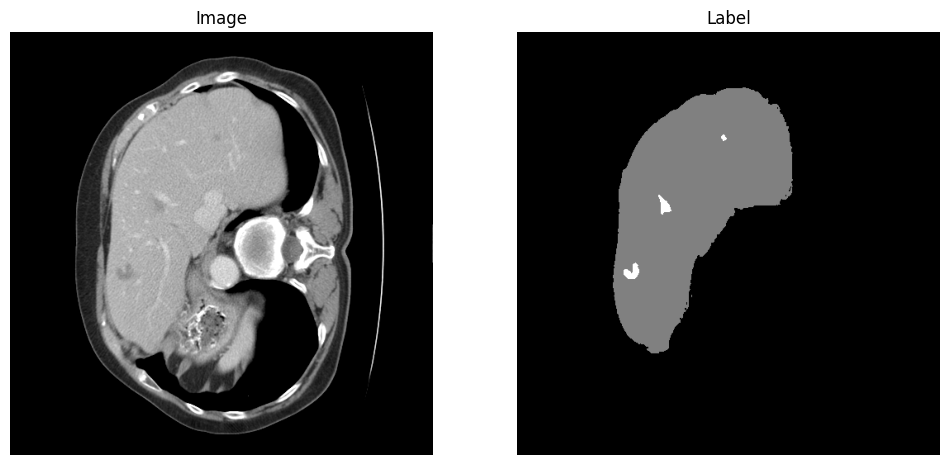

In [17]:

for images, labels in loader:
    image = images[0]  # Ëé∑ÂèñÊâπÊ¨°‰∏≠ÁöÑÁ¨¨‰∏Ä‰∏™ÂõæÂÉè
    label = labels[0]  # Ëé∑ÂèñÂØπÂ∫îÁöÑÁ¨¨‰∏Ä‰∏™Ê†áÁ≠æ
    print(image.shape, label.shape)
    print(image.dtype, label.dtype)
    print(image.min(), image.max())
    print(label.min(), label.max())
    # print(image.unique())
    print(label.unique())

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.squeeze(), cmap='gray')  # ÂÅáËÆæÂõæÂÉèÊòØÂçïÈÄöÈÅìÁöÑ
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(label.squeeze(), cmap='gray')  # ÂÅáËÆæÊ†áÁ≠æÊòØÂçïÈÄöÈÅìÁöÑ
    plt.title('Label')
    plt.axis('off')

    plt.show()
    break  # Âè™Â±ïÁ§∫Á¨¨‰∏Ä‰∏™ÊâπÊ¨°


In [6]:

model = UNetTestModel(image_path=image_paths, label_path=label_paths)

# ËÆ≠ÁªÉÊ®°Âûã
trainerTest = L.Trainer(max_epochs=50)
trainerTest.fit(model, train_dataloaders=loader, val_dataloaders=val_loader)


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name           | Type               | Params
------------------------------------------------------
0 | model          | Unet               | 24.4 M
1 | train_accuracy | MulticlassAccuracy | 0     
2 | val_accuracy   | MulticlassAccuracy | 0     
3 | Dice           | Dice               | 0     
------------------------------------------------------
24.4 M    Trainable params
0         Non-trainable params
24.4 M    Total params
97.722    Total estimated model params size (MB)
INFO:lightning.pyt

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=39` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=39` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


mask unique: tensor([0, 1])
prediction unique: tensor([0, 1])
prediction shape: torch.Size([1, 512, 512])


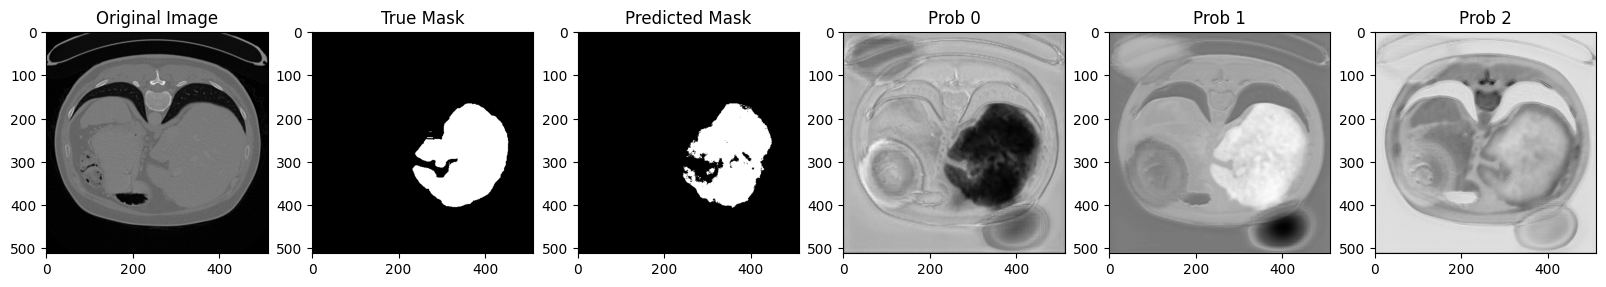

In [ ]:
import matplotlib.pyplot as plt
import torch

# Á°Æ‰øùÂú®Ëøô‰∏ÄÊ≠•‰πãÂâçÂ∑≤ÁªèÂÆö‰πâÂπ∂ËÆ≠ÁªÉ‰∫Ü model Âíå train_loader

# ‰ªéÊï∞ÊçÆÂä†ËΩΩÂô®‰∏≠Ëé∑Âèñ‰∏ÄÊâπÊï∞ÊçÆ
batch = next(iter(loader))
images, masks = batch

# ÈÄâÊã©Áî®‰∫éÈ¢ÑÊµãÁöÑÂõæÁâáÂíåÊé©Á†Å
image = images[0].unsqueeze(0)  # Ê∑ªÂä†ÊâπÊ¨°Áª¥Â∫¶
mask = masks[0]

# Á°Æ‰øùÊ®°ÂûãÂ§Ñ‰∫éËØÑ‰º∞Ê®°Âºè
model.eval()

# Â∞ÜÂõæÂÉèÁßªÂä®Âà∞Ê®°ÂûãÊâÄÂú®ÁöÑËÆæÂ§á‰∏ä
device = next(model.parameters()).device  # Ëé∑ÂèñÊ®°ÂûãÁöÑËÆæÂ§á
image = image.to(device)

# ËøõË°åÈ¢ÑÊµã
with torch.no_grad():
    pred = model(image)
    prediction = torch.argmax(pred, dim=1).cpu()  # Ëé∑ÂèñÈ¢ÑÊµãÁ±ªÂà´Âπ∂ÁßªÂõûCPU

# ÂèØËßÜÂåñ
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
axs[0].imshow(image.squeeze().cpu().numpy(), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(mask.cpu().numpy(), cmap='gray')
axs[1].set_title('True Mask')
print(f'mask unique: {torch.unique(mask)}')

axs[2].imshow(prediction[0].numpy(), cmap='gray')
axs[2].set_title('Predicted Mask')
print(f'prediction unique: {torch.unique(prediction)}')
print(f'prediction shape: {prediction.shape}')

axs[3].imshow(pred[0][0].numpy(), cmap='gray')
axs[3].set_title('Prob 0')
axs[4].imshow(pred[0][1].numpy(), cmap='gray')
axs[4].set_title('Prob 1')
axs[5].imshow(pred[0][2].numpy(), cmap='gray')
axs[5].set_title('Prob 2')
plt.show()
